In [40]:
import pandas as pd

# Load data mentah
df = pd.read_csv('heart_disease_raw.csv')

# Tampilkan 5 baris pertama
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [41]:
!pip install pandas

You should consider upgrading via the 'c:\semester 6\data mining\tubes heart disease\.venv\scripts\python.exe -m pip install --upgrade pip' command.


In [42]:
# Info struktur dan tipe data
df.info()

# Cek jumlah missing values per kolom
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

In [43]:
df.rename(columns={'cholestoral': 'cholesterol', 'Max_heart_rate': 'max_heart_rate'}, inplace=True)

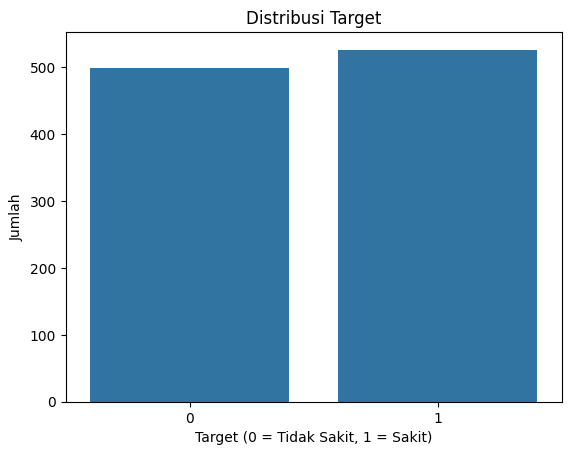

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['target'])
plt.title('Distribusi Target')
plt.xlabel('Target (0 = Tidak Sakit, 1 = Sakit)')
plt.ylabel('Jumlah')
plt.show()

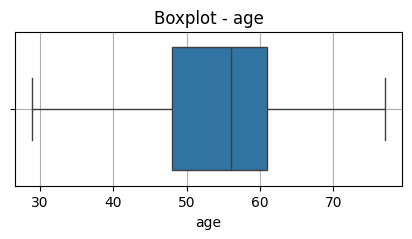

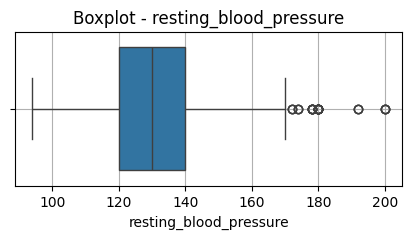

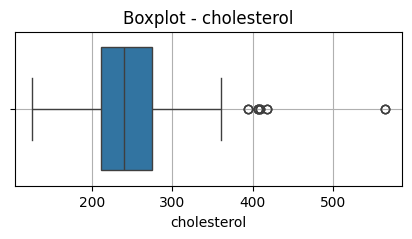

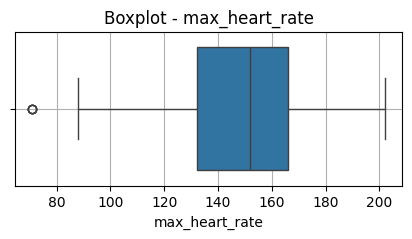

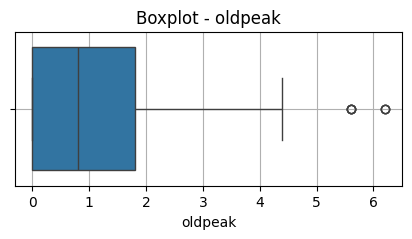

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate', 'oldpeak']:
    plt.figure(figsize=(5, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot - {col}')
    plt.grid(True)
    plt.show()

In [46]:
features_clustering = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate', 'oldpeak']

In [87]:
from sklearn.preprocessing import StandardScaler

df_scaled = df.copy()

scaler = StandardScaler()
df_scaled[features_clustering] = scaler.fit_transform(df[features_clustering])


In [48]:
!pip install scikit-learn

You should consider upgrading via the 'c:\semester 6\data mining\tubes heart disease\.venv\scripts\python.exe -m pip install --upgrade pip' command.


In [49]:
with pd.ExcelWriter('heart_disease_preprocess.xlsx') as writer:
    df.to_excel(writer, sheet_name='Raw_Data', index=False)
    df_scaled.to_excel(writer, sheet_name='Processed_Data', index=False)

print("File 'heart_disease_preprocess.xlsx' berhasil disimpan.")

File 'heart_disease_preprocess.xlsx' berhasil disimpan.


In [50]:
!pip install openpyxl

You should consider upgrading via the 'c:\semester 6\data mining\tubes heart disease\.venv\scripts\python.exe -m pip install --upgrade pip' command.


c:\SEMESTER 6\DATA MINING\TUBES HEART DISEASE\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\SEMESTER 6\DATA MINING\TUBES HEART DISEASE\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\SEMESTER 6\DATA MINING\TUBES HEART DISEASE\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\SEMESTER 6\DATA MINING\TUBES HEART DISEASE\.venv\lib\site-packages\sklearn\cluster\_kmeans.

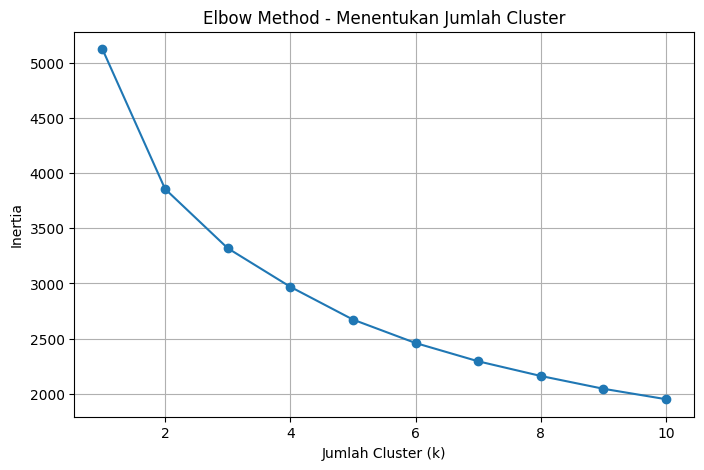

In [51]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Gunakan data yang sudah distandarisasi
X = df_scaled[features_clustering]

# Coba beberapa jumlah cluster dan simpan nilai inertia (jarak antar titik dan pusat cluster)
inertias = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method - Menentukan Jumlah Cluster')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [52]:
# model KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Tambahkan hasil cluster ke dataframe
df_scaled['Cluster'] = clusters


c:\SEMESTER 6\DATA MINING\TUBES HEART DISEASE\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


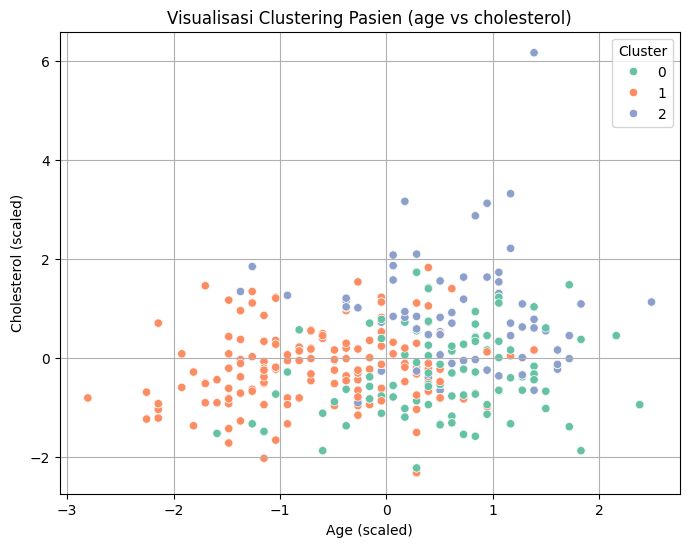

In [53]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_scaled, x='age', y='cholesterol', hue='Cluster', palette='Set2')
plt.title('Visualisasi Clustering Pasien (age vs cholesterol)')
plt.xlabel('Age (scaled)')
plt.ylabel('Cholesterol (scaled)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [54]:
# Gabungkan cluster ke data asli untuk dianalisis
df_with_cluster = df.copy()
df_with_cluster['Cluster'] = clusters

# Rangkuman statistik tiap cluster
cluster_summary = df_with_cluster.groupby('Cluster')[features_clustering + ['target']].mean()
cluster_summary


,age,resting_blood_pressure,cholesterol,max_heart_rate,oldpeak,target
Cluster,,,,,,
0,59.070064,126.391720,229.707006,127.458599,1.905732,0.238854
1,48.457806,125.434599,233.761603,163.917722,0.399578,0.757384
2,60.244726,150.881857,292.063291,148.198312,1.310127,0.388186


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [56]:
features_classification = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate', 'oldpeak']

print(f"\nFeatures untuk klasifikasi: {features_classification}")

X = df[features_classification]
y = df['target']


Features untuk klasifikasi: ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate', 'oldpeak']


In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [58]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

Akurasi model: 0.72


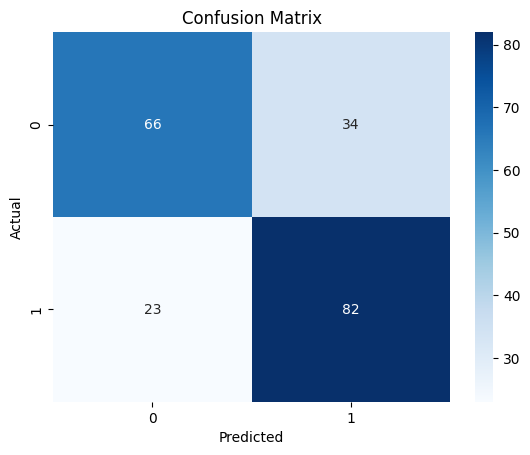

              precision    recall  f1-score   support

           0       0.74      0.66      0.70       100
           1       0.71      0.78      0.74       105

    accuracy                           0.72       205
   macro avg       0.72      0.72      0.72       205
weighted avg       0.72      0.72      0.72       205



In [59]:
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

report = classification_report(y_test, y_pred)
print(report)


In [60]:
import joblib

joblib.dump(model, 'logistic_regression_heart_model.pkl')

joblib.dump(scaler, 'scaler_heart.pkl')


['scaler_heart.pkl']